In [80]:
#!f2py --f90exec=mpif90 -I. -c -m ocean ocean.f90

<img src="../figs/ex4-fig1.png" width="60%">

You will note that there are several folders corresponding to different radar sites. We will use the dataset from [Fraser Island](https://www.google.com.au/maps/@-24.8590806,152.2555941,236264m/data=!3m1!1e3?hl=en) in WA.



In [81]:
import time
import numpy as np

import wave as ocean

%matplotlib inline

# Definition of model variables

### Model domain / grid parameters

In [324]:
# Bathymetric filename
bfile = 'FraserDEM.csv'
# Resolution factor
rfac = 1.

### Definition of wave parameters

In [412]:
# Wave heights (m)
H0 = 2

# Define wave source direction at boundary 
# (angle in degrees counterclock wise from horizontal axis)
dir = 30

# Maximum depth for wave influence (m)
wbase = 20

# Sea level position (m)
slvl = 0.

### Definition of sediment parameters

In [413]:
# Mean grain size diameter in m
d50 = 0.0001

# Steps used to perform sediment transport
tsteps = 1000

# Steps used to perform sediment diffusion
dsteps = 1000

# Model initialisation function

### Loading the bathymetry file

In [414]:
#help(ocean.wave.__init__)

In [415]:
wavesed = ocean.wave(filename=bfile,wavebase=wbase,resfac=rfac,dia=d50)

### Defining wave region computational grid

In [416]:
# import numpy as np
# import pandas as pd
# from scipy.ndimage.filters import gaussian_filter

# i1 = 900 
# i2 = 1200 
# j1 = 0
# j2 = 220

# minX = wavesed.regX[i1]
# maxX = wavesed.regX[i2]
# minY = wavesed.regY[j1]
# maxY = wavesed.regY[j2]

# nx = int(round((maxX-minX)/wavesed.dx+1))
# ny = int(round((maxY-minY)/wavesed.dx+1))

# print minX,maxX,nx,round(maxX-minX)
# print minY,maxY,ny
# regX = np.linspace(0.,round(maxX-minX),nx)
# regY = np.linspace(0.,round(maxY-minY),ny)
# regZ = wavesed.regZ[i1:i2+1,j1:j2+1].T
# blurred = gaussian_filter(regZ, sigma=0.5)

# xi, yi = np.meshgrid(regX, regY)
# print xi.shape,regZ.shape
# XY = np.column_stack((xi.flatten(),yi.flatten()))
# print XY.shape
# print XY[:,0]
# print XY[:,1]
# print blurred.flatten()

# df = pd.DataFrame({'X':XY[:,0],'Y':XY[:,1],'Z':blurred.flatten()})
# df.to_csv('smoothtopo.csv',columns=['X','Y','Z'], sep=' ', index=False,header=0)

In [417]:
t0 = time.clock()
wavesed.findland(slvl)
print 'Wave region computation took (s):',time.clock()-t0

Wave region computation took (s): 0.103808


### Initialising wave boundary conditions 

In [418]:
wdir = wavesed.wavesource(dir)

# Waves evolution

The waves are then transformed from deep to shallow water assuming shore-parallel depth contours. The orientation of wave fronts is determine by wave celerity and refraction due to depth variations. 

Travel time in the domain is calculated from Huygen's principle (using an order $\sqrt{5}$ approximation).

Assuming no refraction or loss of energy due to bottom friction, wave power P is conserved from deep to shallow water. 

In [419]:
#help(wavesed.cmptwaves)

In [420]:
t0 = time.clock()
wavesed.cmptwaves(src=wdir, h0=H0, sigma=1.)
print 'Wave parameters computation took (s): ',time.clock()-t0

Wave parameters computation took (s):  0.275585


## Visualisation of wave characteristics

In [421]:
#help(wavesed.plotData)

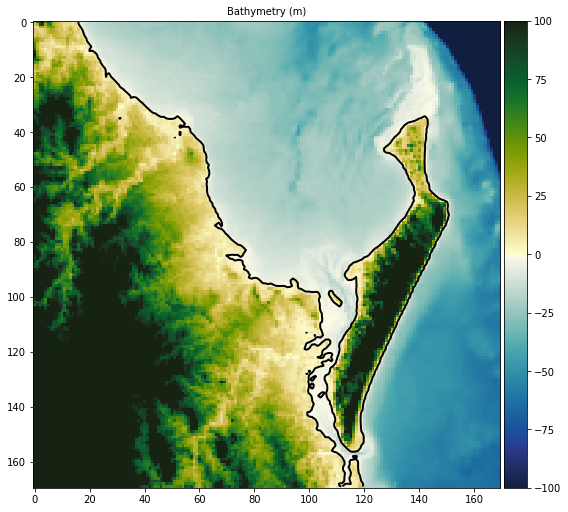

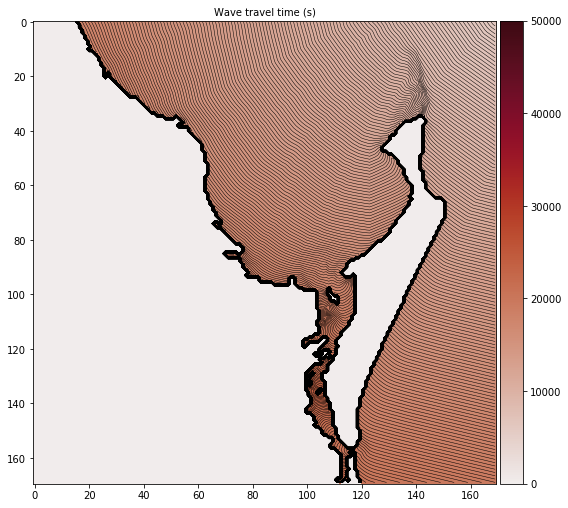

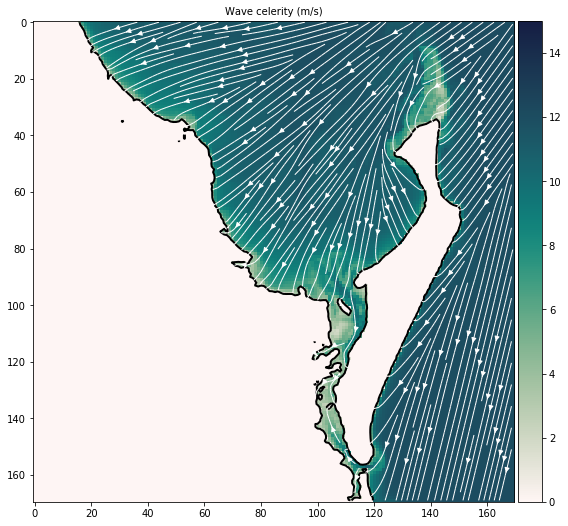

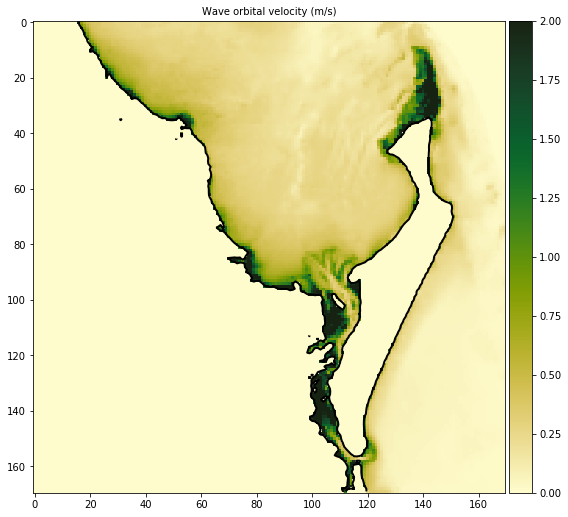

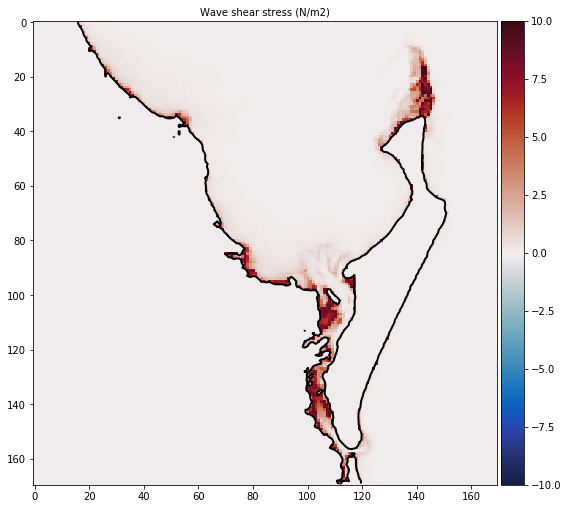

In [422]:
size = (8,8)
i1 = 0 
i2 = -1
j1 = 0
j2 = -1

# Zooming to a specific region
i1 = 80 
i2 = 250 
j1 = 0
j2 = 170 

wavesed.plotData(data='bathy', figsize=size, vmin=-100, vmax=100, 
                 fontsize=10, imin=i1, imax=i2, jmin=j1, jmax=j2)

wavesed.plotData(data='travel', figsize=size, tstep=100, vmin=0, vmax=5.e4, 
                 fontsize=10, imin=i1, imax=i2, jmin=j1, jmax=j2)

wavesed.plotData(data='wcelerity', figsize=size, vmin=0, vmax=15, 
                 fontsize=10, stream=3, imin=i1, imax=i2, jmin=j1, jmax=j2)

wavesed.plotData(data='ubot', figsize=size, vmin=0, vmax=2, 
                 fontsize=10, imin=i1, imax=i2, jmin=j1, jmax=j2)

wavesed.plotData(data='shear', figsize=size, vmin=-10, vmax=10, 
                  fontsize=10, imin=i1, imax=i2, jmin=j1, jmax=j2)

# Sediment entrainment, transport & deposition

Sediment entrainment relates to wave induced shear stress. The transport is computed according to both
wave direction and longshore transport. Deposition is dependent of shear stress and diffusion.

In [408]:
#help(wavesed.cmptsed)

In [423]:
t0 = time.clock()
wavesed.cmptsed(sigma=1.,tsteps=tsteps,dsteps=dsteps)
print 'Sediment erosion/deposition computation took (s): ',time.clock()-t0

Sediment erosion/deposition computation took (s):  0.532088


## Visualisation of sediment transport characteristics

In [410]:
#help(wavesed.plotData)

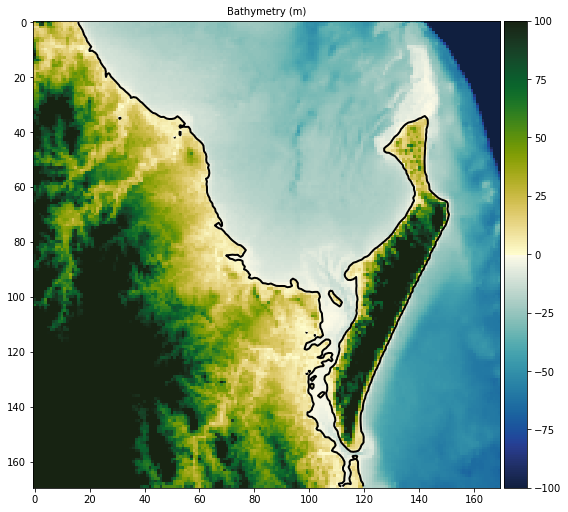

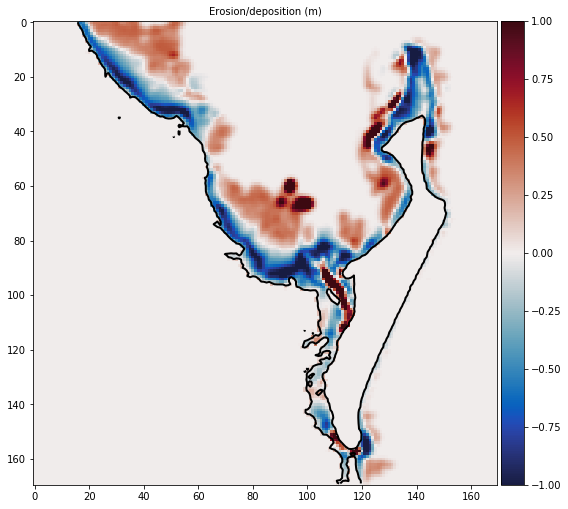

In [424]:
size = (8,8)
# i1 = 0 
# i2 = -1
# j1 = 0
# j2 = -1

# Zooming to a specific region
i1 = 80 
i2 = 250 
j1 = 0
j2 = 170

wavesed.plotData(data='fbathy', figsize=size, vmin=-100, vmax=100, 
                 fontsize=10, stream=0, imin=i1, imax=i2, jmin=j1, jmax=j2)

wavesed.plotData(data='erodep', figsize=size, vmin=-1., vmax=1., 
                 fontsize=10, stream=0, imin=i1, imax=i2, jmin=j1, jmax=j2, save='wdir30')

# Saving wave/sedimentation data

In [78]:
#waveparams.outputCSV(filename='erodep.csv', seddata=1)